## Sample

In [1]:
import numpy as np
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We start by importing the MandelAgol transit model, initialising sensible parameters for the transiting planet, creating a time array t, and initialising the quadratic limb darkening coefficient arrays us and um. Here us contains a single set of quadratic limb darkening coefficients, while um contains 10 sets.
The parameters define the orbit and the size of the planet relative to its host star, and are:

* k planet to star radius ratio
* t0 zero epoch
* p orbital period
* a scaled semi-major axis
* i orbital inclination
* e orbital eccentricity
* w argument of periastron

You wouldn't want to use this parameterisation in a real parameter estimation problem, since many of the parameters are correlated with each other. Instead, you'd use a separate sampling parametrisation that would then be mapped to this physical parameterisation.

In [30]:
k, t0, p, a, i, e, w = 0.1, 1., 4., 8., 0.5*pi, 0.01, 0.5*pi
t = linspace(0.9,1.1,500)
#t = linspace(0.8,t0+p,500)

#initialize quadratic limb darkening coefficient arrays us and um
us = [0.4,0.1] #1 set of coeff
um = array([[0.04*iu, 0.025*iu] for iu in range(10)]) #10 sets

In [31]:
um

array([[ 0.   ,  0.   ],
       [ 0.04 ,  0.025],
       [ 0.08 ,  0.05 ],
       [ 0.12 ,  0.075],
       [ 0.16 ,  0.1  ],
       [ 0.2  ,  0.125],
       [ 0.24 ,  0.15 ],
       [ 0.28 ,  0.175],
       [ 0.32 ,  0.2  ],
       [ 0.36 ,  0.225]])

#### Basic model usage

Create an instance of the transit model, accept the default values

In [32]:
from pytransit import MandelAgol as MA
rc('font', size=12)

md = MA()

and evaluate the model for the two cases of limb darkening coefficient sets

In [33]:
fs = md.evaluate(t, k, us, t0, p, a, i, e, w)
fm = md.evaluate(t, k, um, t0, p, a, i, e, w)

In [136]:
#t, k, u, t0, p, a, i, e=0.0, w=0.0, c=0.0
md.evaluate?
#can we turn off limb darkening, u?

In [7]:
print(fs.shape)
print(fm.shape)

(500,)
(500, 10)


The MandelAgol.evaluate method offers a direct way for the calculation of the light curve as a function of time t. It uses a circular orbit model if eccentricity is close to zero (smaller than 1e-5), and slower eccentric orbit model with non-zero eccentricities.

The MandelAgol._ _call_ _ method offers a way to evaluate the transit model as a function of normalised projected distance z. This is useful if we don't want to recalculate the orbit but change the limb darkening coefficients or contamination factor, or if we have a better (faster) method for the calculation of z than provided by the package.

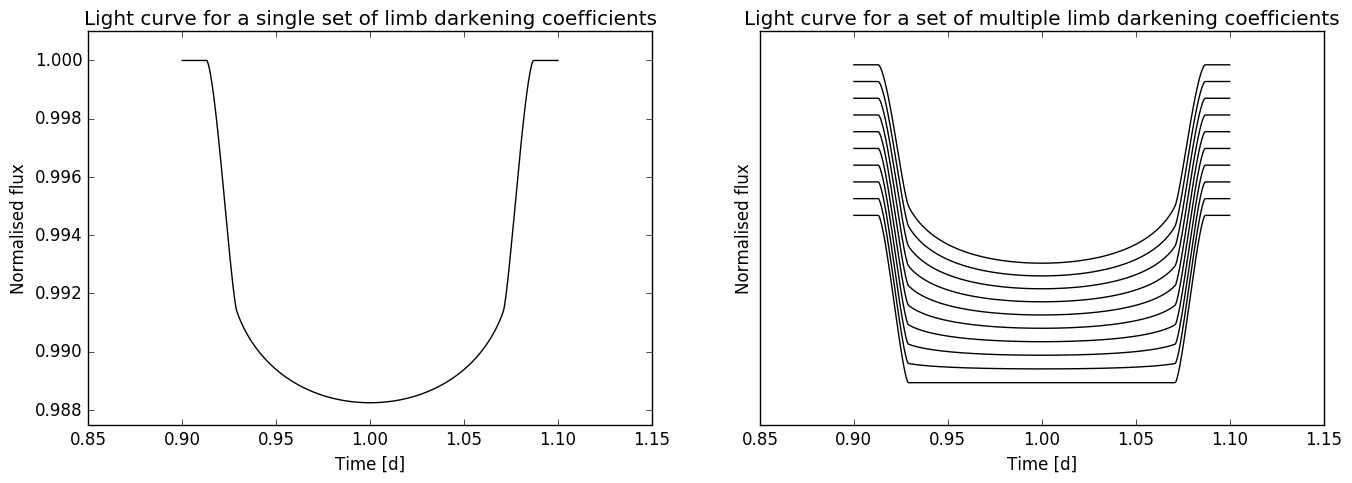

In [34]:
fig,ax = subplots(1,2,figsize=(14,5))
#lightcurve 
ax[0].plot(t,fs, 'k');
#10 curves with various limb darkening coeffs
ax[1].plot(t,fm + np.arange(um.shape[0])*0.001, 'k');
setp(ax[0], ylim=(0.9875,1.001), 
     xlabel='Time [d]', ylabel='Normalised flux', 
     title='Light curve for a single set of limb darkening coefficients');
setp(ax[1], ylim=(0.9875,b1.011), 
     yticks=[], xlabel='Time [d]', ylabel='Normalised flux', 
     title='Light curve for a set of multiple limb darkening coefficients');
#change 
fig.tight_layout()
#fig.savefig('model_example_1.png')

# Does not work

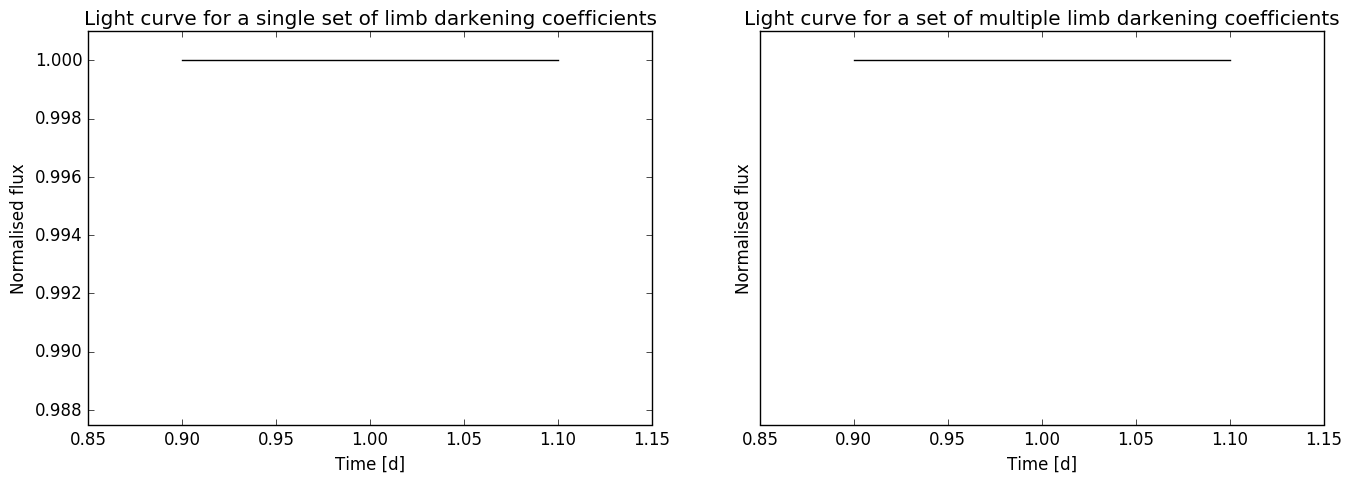

In [144]:
t = linspace(0.9,1.1,100)

k1 = 0.1 #typical value ~ R_Earth/R_sun 
k2 = np.linspace(R_Earth/R_sun, 0.5, 100) #13*R_Jup is bigger than solar diameter
#assert len(t) == len(k2)

u = [0.4,0.1]

fs = md.evaluate(t, k1, u, t0, p, a, i, e, w)
fm = md.evaluate(t, k2, u, t0, p, a, i, e, w)

fig,ax = subplots(1,2,figsize=(14,5))
#lightcurve 
ax[0].plot(t,fs, 'k');
#10 curves with various limb darkening coeffs
ax[1].plot(t,fm, 'k');
setp(ax[0], ylim=(0.9875,1.001), 
     xlabel='Time [d]', ylabel='Normalised flux', 
     title='Light curve for a single set of limb darkening coefficients');
setp(ax[1], ylim=(0.9875,1.001), 
     yticks=[], xlabel='Time [d]', ylabel='Normalised flux', 
     title='Light curve for a set of multiple limb darkening coefficients');
#change 
fig.tight_layout()
#fig.savefig('model_example_1.png')

# Let's investigate the effect of changing the fitting parameters one by one:

In [36]:
#Define common constants
M_sun = 1.989E30 #kg
M_star= 1*M_sun 

M_planet = 0 #negligible
M_Jup = 1.898E27 #kg
M_Earth = 5.972E24 #kg
M_Neptune=1.024E26 #kg

R_sun = 696300000 #m
R_Jup = 69911000 #m 
R_Neptune = 24622000 #m
R_Earth = 6371000 #m

G = 6.67E-11 #
AU = 1.496E11 #m

In [121]:
#Earth to brown dwarf boundary (analog for radius, not mass) in multiples of R_Earth
k1 = 0.1 #typical value ~ R_Earth/R_sun 
#k2 = np.linspace(R_Earth/R_sun, 0.5, 100) #13*R_Jup is bigger than solar diameter

k2 = array([[R_Earth/R_sun*i] for i in range(10)]) #10 sets
print(k2)

[[ 0.        ]
 [ 0.00914979]
 [ 0.01829958]
 [ 0.02744938]
 [ 0.03659917]
 [ 0.04574896]
 [ 0.05489875]
 [ 0.06404854]
 [ 0.07319833]
 [ 0.08234813]]


In [116]:
u  = [0.4,0.1] #arbitrarily chosen
t0 = 1
p  = 2*365
a = 30.1*AU
i = 0.5*np.pi
e = 0
w = 0#.5*np.pi

In [145]:
def delta(R_p,R_s):
    return (R_p/R_s)**2

def transit_time(R_s, a, p):
    return (R_s*p)/(np.pi*a)

delta = delta(R_Neptune,R_sun)
duration = transit_time(R_sun,a, p)
print('transit depth = {0:.3f}'.format(delta))
print('transit duration = {0:.3f} days'.format(duration))

transit depth = 0.001
transit duration = 0.036 days


In [146]:
t = np.linspace(t0-duration,t0+duration,100)

Note that k2 & t should have the same dimensions that's why I used linspace.

In [147]:
k_i = md.evaluate(t, k1, u, t0, p, a, i, e, w)
k_set = md.evaluate(t, k2, u, t0, p, a, i, e, w)
k_set.shape

(100,)

The depth of transit should be:

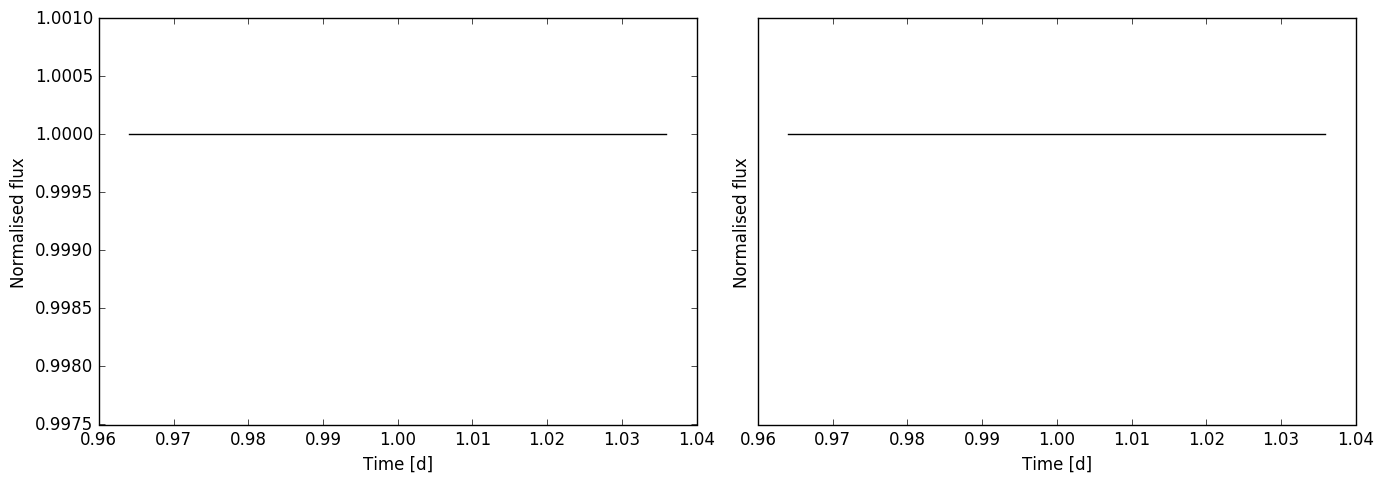

In [149]:
fig,ax = subplots(1,2,figsize=(14,5))
#lightcurve 
ax[0].plot(t, k_i, 'k');
#10 curves with various limb darkening coeffs
ax[1].plot(t, k_set, 'k');
setp(ax[0], ylim=(1-2*delta,1.001), 
     xlabel='Time [d]', ylabel='Normalised flux');#, 
     #title='Light curve for a single set of limb darkening coefficients');
setp(ax[1], ylim=(1-2*delta,1.001), 
     yticks=[], xlabel='Time [d]', ylabel='Normalised flux');#, 
     #title='Light curve for a set of multiple limb darkening coefficients');
#change 
fig.tight_layout()
#fig.savefig('model_example_1.png')

# 1. 
Polly Photometer studies the star psi Cap. She has heard that this star has a Neptune-like planet orbiting it with a period of 2 years.

### a. Create a graph showing the (theoretical) V-band light curve of this star during a transit. Make sure that your scales on the time and magnitude axes are accurate.


Psi Capricorni ($\psi$ Cap, $\psi$ Capricorni) is a star in the constellation Capricornus. $\psi$ Cap is a yellow-white **F-type main sequence dwarf** with an apparent magnitude of M = +4.13. It is approximately d=47.9 light years from Earth. The measured rotational velocity of this star is approximately $v_{\mathrm{rot}}$ = 41 km/s[6] (the Sun has an equatorial rotation velocity of 2 km/s). Analysis of the line profile of the star's spectrum indicates that it is undergoing differential rotation, with the variation by latitude being similar to the Sun.

References:
Habets, G. M. H. J.; Heintze, J. R. W. (November 1981). "Empirical bolometric corrections for the main-sequence". Astronomy and Astrophysics Supplement. 46: 193–237. Bibcode:1981A&AS...46..193H

In [156]:
t0 = 1. #midtransit: unknown; value should be between t_lims (centered on x-axis)
p_in_day = 2*365 #period = 2 years in days 
p_in_sec = 2*365*24*60*60
a = (G*(M_star+M_planet)/(4*np.pi**2)*p_in_sec**2)**(1/3)
i = 0.5*np.pi #edge-on assumption-- in deg
e = 0 #circular orbit assumption
w = 0.5*np.pi #arg. of periastron =90 assumption-- in deg (e.g. periastron and reference aligned; true anomaly = 0)
k = M_Neptune/M_star 
#Psi Cap is F2V dwarf star=1.0 to 1.4 M_sun and T_surf = 6000-7600 K

t = linspace(0.5,1.5,1000)

#unknown
us = [0.4,0.1]
um = array([[0.04*iu, 0.025*iu] for iu in range(10)])

In [158]:
a/AU

1.5864501678408804

In [159]:
def delta(R_p,R_s):
    k=R_p/R_s
    return k**2

delta(R_Neptune,R_sun)

0.00125041410385487

In [160]:
def P_trans(a, R_s, R_p, e, w):
    P_t = (a/(2*(R_s+R_p)))*((1-e*np.cos(np.pi/2)-w)/(1-e**2))
    return P_t

P_trans(a, R_sun, R_Neptune, e, w)

-93.955222129182886

3123.0563084494579

### b. Create a graph showing the (theoretical) V-band light curve of this star during one full orbit of the planet. Assume that the albedo of the planet's clouds is a = 0.5. Make a closeup around the time of the secondary eclipse (= occultation = when the planet goes behind the star). Make sure that your scales on the time and magnitude axes are accurate.

### c. Bonus! Polly has access to a 1-m space telescope with an expensive CCD. Should she apply for time to observe this star and actually confirm the presence of this planet? Should she ask for time around both primary and secondary eclipses? Justify your answer.

# 2.
Polly decides to look at a different star instead. She acquires the following photometric measurements during one transit. Answer the following as well as you can; include uncertainties where possible.

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

filename='sample_transit.dat'
df = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df.head()

df.columns = ['t','f']
t =df.t
f =df.f

Populating the interactive namespace from numpy and matplotlib


### a. What is the depth of this transit?

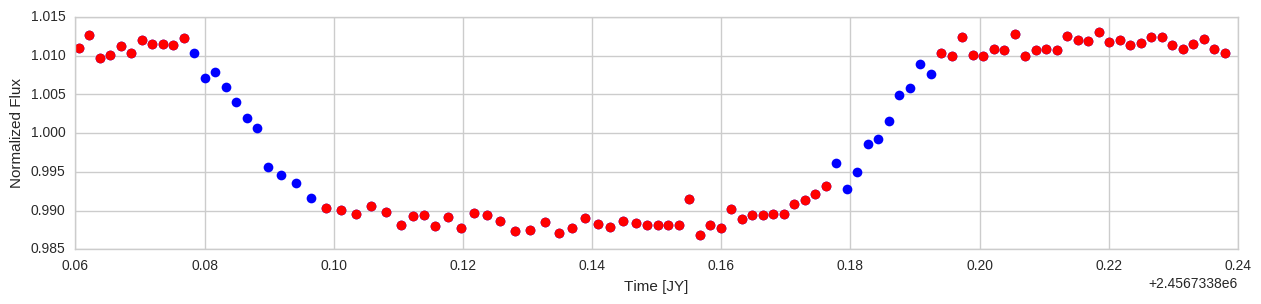

In [92]:
import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t,f,'bo')
    ax.plot(t[:11],f[:11],'ro')
    ax.plot(t[74:],f[74:],'ro')
    ax.plot(t[22:64],f[22:64],'ro')
    ax.set_xlabel('Time [JY]')
    ax.set_ylabel('Normalized Flux')

In [90]:
top = f[:11]
top.append(f[74:-1])
lc_max=np.median(top)

bottom = f[22:64]
lc_min = np.median(bottom)
lc_max - lc_min

0.022377265504255894

In [61]:
delta = (R_planet/R_star)**2

NameError: name 'R_planet' is not defined

### b. What is the duration of this transit?

In [ ]:
T = p(R_star/np.pi*a)

### c. What is the time of mid-transit?

In [ ]:
t0

### d. (Bonus!) Polly finds in a textbook that limb-darkening is sometimes expressed in the following manner. If θ is the angle between the line of sight to the observer and the line from the center of the star to a point on the photosphere, then the intensity of that point I relative to the intensity at the center of the disk I0 is


### What is the value of the coefficient μ which fits this data best?

In [ ]:
I = I_0(1-mu(1-np.cos*theta))

In [94]:
import gatspy
from gatspy.periodic import LombScargleFast

f /= np.median(f)                 #normalize

model = LombScargleFast().fit(t, f)
periods, power = model.periodogram_auto(nyquist_factor=100)

In [95]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

TypeError: 'int' object is not subscriptable

### e. Bonus! This is a real exoplanet. Which one?

# 3.
Aliens are everywhere, and they have telescopes! Every single star within 25 parsecs of the Sun has an alien astronomer, and all of them are constantly monitoring the Sun.

### a. How many of these astronomers will be able to see a transit by the Earth?
The transit probability for an exoplanet is the probability that the planet would be observed to eclipse its parent star if the planet and its parent star were observed at random orientations with respect to the inclination angle of the planet's plane of orbit.

In [ ]:
P = (R_p + R_s)/a

n = N*P

### b. How many of these astronomers will be able to see a transit by any planet?